# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units="imperial"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
data = []
towns = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_Speed = []
country = []      
date = []
counter = 0
site = "https://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval     ")
print("-----------------------------")
for city in cities:
    url = f"{site}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    try:
        counter += 1
        
        lat.append(response['coord']["lat"])
        lng.append(response["coord"]["lon"])
        town = response["name"]
        towns.append(town)
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_Speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        data.append(response)
        print(f"Processing Record {counter} of Set 1 | {city}____{town}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | barrow____Barrow
Processing Record 3 of Set 1 | arraial do cabo____Arraial do Cabo
Processing Record 4 of Set 1 | kapaa____Kapaa
Processing Record 5 of Set 1 | rikitea____Rikitea
Processing Record 6 of Set 1 | cherskiy____Cherskiy
Processing Record 7 of Set 1 | bull savanna____Bull Savanna
Processing Record 8 of Set 1 | saint-joseph____Saint-Joseph
Processing Record 9 of Set 1 | kruisfontein____Kruisfontein
Processing Record 10 of Set 1 | jamestown____Jamestown
Processing Record 11 of Set 1 | pangnirtung____Pangnirtung
Processing Record 12 of Set 1 | airai____Airai
City not found. Skipping...
Processing Record 14 of Set 1 | dikson____Dikson
Processing Record 15 of Set 1 | bambous virieux____Bambous Virieux
Processing Record 16 of Set 1 | east london____East London
Processing Record 17 of Set 1 | dragor____Dragør
Processing Record 18 of Set 1 | miri____Marabu
Processing

Processing Record 157 of Set 1 | beloha____Beloha
Processing Record 158 of Set 1 | bonnyville____Bonnyville
Processing Record 159 of Set 1 | schweinfurt____Schweinfurt
Processing Record 160 of Set 1 | san quintin____San Quintín
Processing Record 161 of Set 1 | ahipara____Ahipara
Processing Record 162 of Set 1 | mogadishu____Mogadishu
Processing Record 163 of Set 1 | chapais____Chapais
City not found. Skipping...
Processing Record 165 of Set 1 | nishihara____Nishihara
Processing Record 166 of Set 1 | lebu____Lebu
Processing Record 167 of Set 1 | talara____Talara
Processing Record 168 of Set 1 | praia____Praia
Processing Record 169 of Set 1 | bilibino____Bilibino
Processing Record 170 of Set 1 | vostok____Vostok
Processing Record 171 of Set 1 | san andres____San Andrés
Processing Record 172 of Set 1 | radhanpur____Rādhanpur
Processing Record 173 of Set 1 | thompson____Thompson
Processing Record 174 of Set 1 | denpasar____Denpasar
Processing Record 175 of Set 1 | sevenoaks____Sevenoaks
Pr

Processing Record 313 of Set 1 | muroto____Muroto-misakicho
Processing Record 314 of Set 1 | catio____Catió
Processing Record 315 of Set 1 | balkhash____Balkhash
Processing Record 316 of Set 1 | ambunti____Ambunti
City not found. Skipping...
Processing Record 318 of Set 1 | outjo____Outjo
Processing Record 319 of Set 1 | hami____Kumul
Processing Record 320 of Set 1 | ola____Ola
Processing Record 321 of Set 1 | lethem____Lethem
Processing Record 322 of Set 1 | sampit____Sampit
Processing Record 323 of Set 1 | cabatuan____Cabatuan
Processing Record 324 of Set 1 | soavinandriana____Soavinandriana
Processing Record 325 of Set 1 | chifeng____Chifeng
Processing Record 326 of Set 1 | cabo san lucas____Cabo San Lucas
Processing Record 327 of Set 1 | julio de castilhos____Júlio de Castilhos
Processing Record 328 of Set 1 | lompoc____Lompoc
Processing Record 329 of Set 1 | kalininsk____Kalininsk
City not found. Skipping...
Processing Record 331 of Set 1 | faanui____Faanui
Processing Record 332 o

Processing Record 467 of Set 1 | matara____Matara
Processing Record 468 of Set 1 | bengkulu____Bengkulu
Processing Record 469 of Set 1 | sur____Sur
City not found. Skipping...
Processing Record 471 of Set 1 | los llanos de aridane____Los Llanos de Aridane
Processing Record 472 of Set 1 | campos novos____Campos Novos
Processing Record 473 of Set 1 | namibe____Mossamedes
Processing Record 474 of Set 1 | vestmannaeyjar____Vestmannaeyjar
Processing Record 475 of Set 1 | maxixe____Maxixe
Processing Record 476 of Set 1 | sambava____Sambava
Processing Record 477 of Set 1 | la libertad____La Libertad
Processing Record 478 of Set 1 | ust-tsilma____Ust-Tsilma
Processing Record 479 of Set 1 | campoverde____Campoverde
Processing Record 480 of Set 1 | hobyo____Hobyo
City not found. Skipping...
Processing Record 482 of Set 1 | gat____Kiryat Gat
Processing Record 483 of Set 1 | tiarei____Tiarei
Processing Record 484 of Set 1 | sistranda____Sistranda
Processing Record 485 of Set 1 | kaliua____Kaliua
P

In [4]:
weather_df = pd.DataFrame({"City":towns,"Lat":lat,"Lng":lng,"Max Temp":max_temp,
                           "Humidity":humidity,"Cloudiness":cloudiness,
                           "Wind Speed":wind_Speed,"Country":country,"Date":date,                                                   
                          })

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
weather_df.to_csv("./output_data/weather_info.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-5.78,77,0,14.97,US,1649961321
1,Arraial do Cabo,-22.9661,-42.0278,80.56,74,40,12.66,BR,1649961322
2,Kapaa,22.0752,-159.3190,77.11,80,40,11.50,US,1649961322
3,Rikitea,-23.1203,-134.9692,77.85,69,7,18.81,PF,1649961322
4,Cherskiy,68.7500,161.3000,13.39,94,100,4.63,RU,1649961193
...,...,...,...,...,...,...,...,...,...
569,Kisangani,0.5167,25.2000,72.27,93,100,1.14,CD,1649961531
570,Brae,60.3964,-1.3530,43.56,76,100,9.51,GB,1649961532
571,Penzance,50.1186,-5.5371,54.28,90,100,10.18,GB,1649961532
572,Igarka,67.4667,86.5833,30.60,97,100,13.94,RU,1649961532


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
#  Get the indices of cities that have humidity over 100%.
city_over_humidity = weather_df.loc[weather_df['Humidity'] == 100,:]
indices = city_over_humidity["City"]

In [100]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df[weather_df['City'].isin(indices)==False]
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-5.78,77,0,14.97,US,1649961321
1,Arraial do Cabo,-22.9661,-42.0278,80.56,74,40,12.66,BR,1649961322
2,Kapaa,22.0752,-159.3190,77.11,80,40,11.50,US,1649961322
3,Rikitea,-23.1203,-134.9692,77.85,69,7,18.81,PF,1649961322
4,Cherskiy,68.7500,161.3000,13.39,94,100,4.63,RU,1649961193
...,...,...,...,...,...,...,...,...,...
569,Kisangani,0.5167,25.2000,72.27,93,100,1.14,CD,1649961531
570,Brae,60.3964,-1.3530,43.56,76,100,9.51,GB,1649961532
571,Penzance,50.1186,-5.5371,54.28,90,100,10.18,GB,1649961532
572,Igarka,67.4667,86.5833,30.60,97,100,13.94,RU,1649961532


In [101]:
# Change time Format from linux type
from datetime import datetime
dt = datetime.fromtimestamp(1649733192)
dt
k=str(dt.isoformat())
s=k.split("T")
today_date = s[0]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

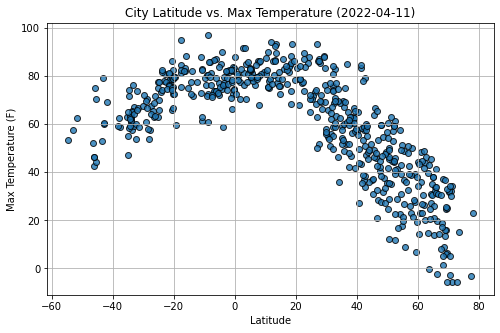

In [102]:
# clean_weather_df.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,xlabel="Max Temperature (F)",
#                      ylabel="Latitude")

x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(label=f"City Latitude vs. Max Temperature ({today_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Max_Temperature.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

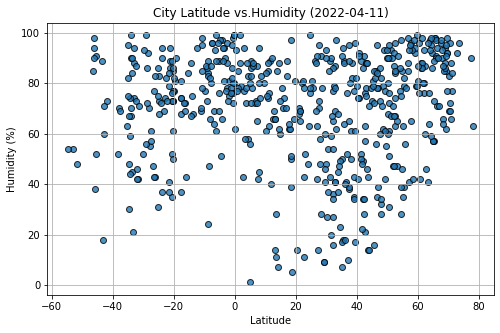

In [103]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(label=f"City Latitude vs.Humidity ({q_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

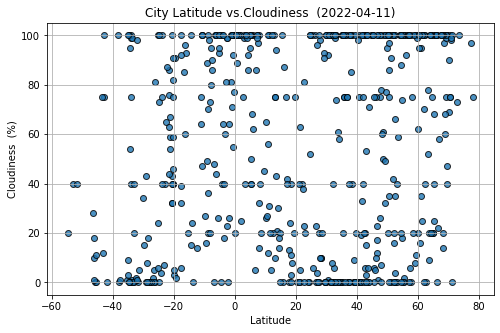

In [104]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness  (%)')
plt.title(label=f"City Latitude vs.Cloudiness  ({q_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

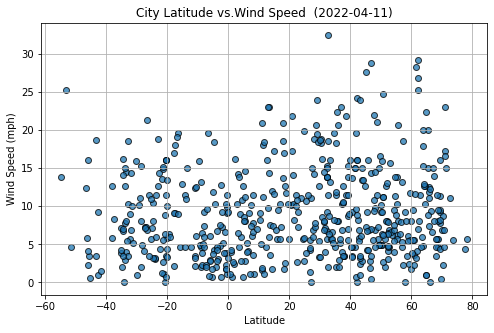

In [105]:
x_values = clean_weather_df['Lat']
y_values = clean_weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(label=f"City Latitude vs.Wind Speed  ({q_date})")
plt.grid()
plt.savefig("./output_data/latitude_vs_Wind_Speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [106]:
n_hemisphere_weather_df = clean_weather_df.loc[weather_df["Lat"] >= 0]
s_hemisphere_weather_df = clean_weather_df.loc[weather_df["Lat"] < 0]
n_hemisphere_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-5.78,77,0,14.97,US,1649961321
2,Kapaa,22.0752,-159.3190,77.11,80,40,11.50,US,1649961322
4,Cherskiy,68.7500,161.3000,13.39,94,100,4.63,RU,1649961193
5,Bull Savanna,17.8868,-77.5902,81.57,62,13,20.87,JM,1649961323
8,Jamestown,42.0970,-79.2353,53.53,34,40,16.11,US,1649961324
...,...,...,...,...,...,...,...,...,...
566,Rome,43.2128,-75.4557,59.14,88,100,24.00,US,1649961530
569,Kisangani,0.5167,25.2000,72.27,93,100,1.14,CD,1649961531
570,Brae,60.3964,-1.3530,43.56,76,100,9.51,GB,1649961532
571,Penzance,50.1186,-5.5371,54.28,90,100,10.18,GB,1649961532


In [107]:
s_hemisphere_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Arraial do Cabo,-22.9661,-42.0278,80.56,74,40,12.66,BR,1649961322
3,Rikitea,-23.1203,-134.9692,77.85,69,7,18.81,PF,1649961322
6,Saint-Joseph,-21.3667,55.6167,77.38,86,54,14.85,RE,1649961323
7,Kruisfontein,-34.0033,24.7314,61.57,90,99,7.81,ZA,1649961324
10,Airai,-8.9266,125.4092,60.66,89,100,2.04,TL,1649961157
...,...,...,...,...,...,...,...,...,...
558,Geraldton,-28.7667,114.6000,66.61,72,0,8.05,AU,1649961527
560,Carlos Chagas,-17.7031,-40.7664,94.73,37,92,2.17,BR,1649961528
567,Gympie,-26.1898,152.6650,63.18,83,81,3.51,AU,1649961346
568,Santana,-0.0583,-51.1817,87.98,62,20,9.22,BR,1649961531


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.746
The correlation between both factors is -0.86


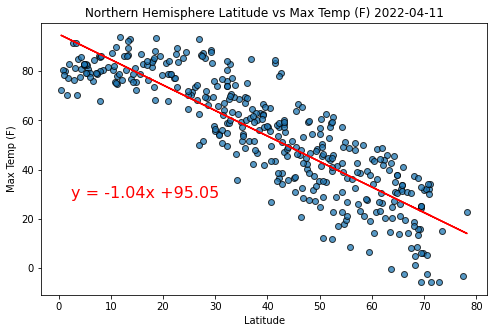

In [108]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp (F)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Max_Temp_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ =  0.746

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.441
The correlation between both factors is 0.66


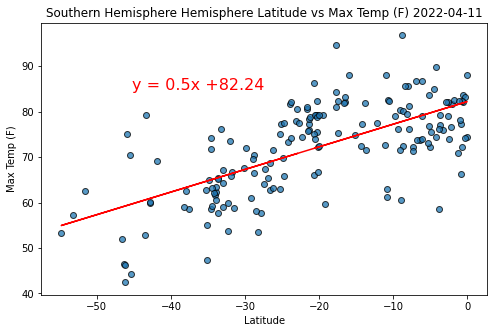

In [109]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Max Temp"]
x_label="Latitude"
y_label="Max Temp (F)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-5,40),xycoords='data',xytext=(0.5, 0.8),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Max_Temp_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.441

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.037
The correlation between both factors is 0.19


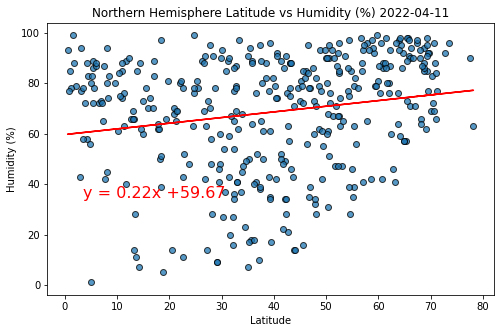

In [110]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Humidity_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.037

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.095
The correlation between both factors is 0.31


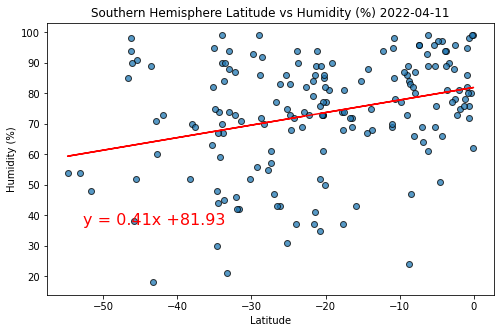

In [111]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Humidity"]
x_label="Latitude"
y_label="Humidity (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-5, 50),xycoords='data',xytext=(0.4, 0.3),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/s_Hemisphere_Humidity_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

The $r^{2}$ = 0.095

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011
The correlation between both factors is 0.11


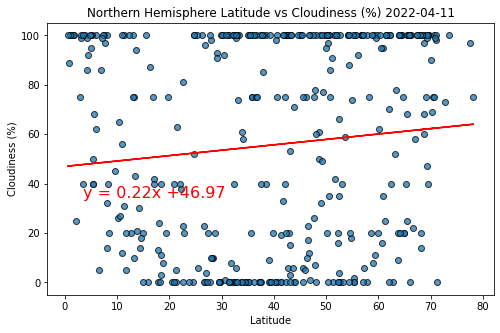

In [112]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Cloudiness_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.164
The correlation between both factors is 0.41


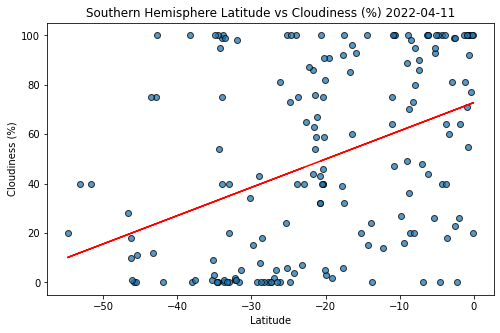

In [113]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness (%)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 50),xycoords='data',xytext=(0.4, 0.4),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Cloudiness_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001
The correlation between both factors is 0.02


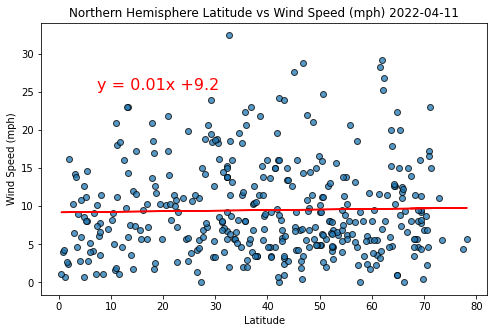

In [114]:
# Inputs
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Northern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(10, 10),xycoords='data',xytext=(0.4, 0.8),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/N_Hemisphere_Wind Speed_vs_Lat_LR.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025
The correlation between both factors is -0.16


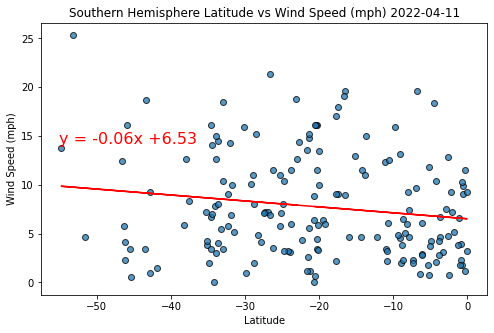

In [115]:
# Inputs
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed (mph)"

# Linear Regression Calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter Plot
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Southern Hemisphere {x_label} vs {y_label} {today_date}")

plt.annotate(line_eq,xy=(-10, 10),xycoords='data',xytext=(0.35, 0.6),
             textcoords='axes fraction',horizontalalignment='right',
             verticalalignment='top',fontsize=16,color="red")

# Linear Regression plot
correlation = st.pearsonr(x_values,y_values)
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(x_values,regress_values,"r-")

# Save plot 
plt.savefig("./output_data/S_Hemisphere_Wind Speed_vs_Lat_LR.png", bbox_inches="tight")
plt.show()